In [1]:
### Assignment 1 ###

import numpy as np
import matplotlib.pyplot as plt

In [16]:
## Q1: eye matrix ##
def eye(num): # numpy에서 함수 있음. np.eye()
    '''
    단위행렬(identity matrix)의 의미가 중요!
    '''
    resList = []
    for i in range(num):
        tempList = []
        for j in range(num):
            if i == j:
                tempList.append(1)
            else:
                tempList.append(0)
        resList.append(tempList)
    return np.array(resList)
eye(5)

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])

In [17]:
## Q2: Linear regression with one variable ##
data = open("d:/data/ML/ex01/ex1data1.txt", encoding='utf-8')
dataList = []
for i in data:
    dataList.append(i.strip('\n').split(',')) # 데이터 전처리 과정 // \n 삭제 // , 단위로 split
data = np.array(dataList, dtype=np.float32) # np.array로 type 한번에 전 처리
# pandas.read를 이용하면, 간단하게 처리 가능
m = len(data) # 행 개수(학습 데이터)
x = data[:, 0] # X col
y = data[:, 1].reshape(m, 1) # y col -> reshape 중요 *행렬이 아닌 array로 인식
learning_rate = 0.01 # 알파
iteration = 1500
# X matrix [1, x]
X = np.ones([m, 2]) # x의 X 행렬 --> 세타0을 행렬 연산 시키기 위해 1열에 x0 = 1 벡터를 추가
X[:, 1] = x
n = len(X[0,:])
# first_W
W = np.zeros([n, 1]) # W의 0행렬을 미리 생성

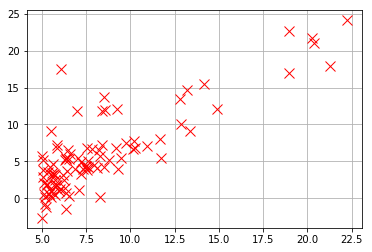

In [9]:
## Q2.1: plot
plt.plot(x, y, 'rx', markersize=10)
plt.grid(True)
plt.show()

In [11]:
## Q2.2: Gradient Descent
def hypothesis(x, W):
    return np.dot(x, W) # 내적 -> XtW

def cost(x, W, y):
    global m
    return float(1. / (2 * m) * np.dot((hypothesis(x, W) - y).T, (hypothesis(x, W) - y))) # cost 계산에서도 내적

cost(X, W, y)

32.07273421977694

In [12]:
## Q2.2.3: computing the cost J
#print(cost(X, W, y)) # 32.07273422
    
def descent(x, W, y):
    costList = []
    WList = []
    for i in range(iteration):
        w_tmp = W
#        if i % 100 == 0:
#            print(cost)
        costList.append(cost(X, W, y))
        WList.append(W)
        for j in range(len(w_tmp)):
            w_tmp[j] = W[j] - (learning_rate / m) * np.sum((hypothesis(X, W) - y) * X[:, j].reshape(m, 1)) # 동기화 (동시에 Cost 값을 조정: 1번에 계산)
        ### reshape 정말 중요 * ###
    return W, costList

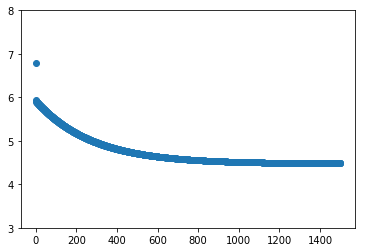

In [18]:
W, costList = descent(X, W, y)
plt.plot(range(len(costList)), costList, 'o')
plt.ylim(3, 8)
plt.show()

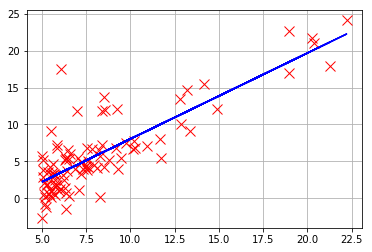

In [20]:
## Q2.4: Visualize J
plt.plot(x, y, 'rx', markersize=10)
plt.grid(True)
plt.plot(x, hypothesis(X, W), 'b-')
plt.show()

In [21]:
#prediction [1, 3.5] / [1, 7]
predict1 = hypothesis([1, 3.5], W)
predict2 = hypothesis([1, 7], W)
predict1, predict2

(array([0.44839846]), array([4.53286066]))

In [22]:
## Q3: Linear regression with multiple variable ##
data = open("d:/data/ML/ex01/ex1data2.txt", encoding='utf-8')
dataList = []
for i in data:
    dataList.append(i.strip('\n').split(','))
data = np.array(dataList, dtype=np.float32)
m = len(data)
memoryList = []

In [23]:
# scaling & rollback
def standard(x):
    global memoryList
    memoryList.append((np.mean(x), np.std(x)))
    return (x - np.mean(x)) / np.std(x)

def rollback(x, num):
    mean, std = memoryList[num][0], memoryList[num][1]
    return x * std + mean

In [24]:
x1 = data[:, 0]
x1_scale = standard(x1)
x2 = data[:, 1]
x2_scale = standard(x2)
y = data[:, -1]
y = standard(y).reshape(m, 1)
learning_rate = 0.01
iteration = 1500
# X matrix [1, x]
X = np.ones([m, 3])
X[:, 1] = x1_scale
X[:, 2] = x2_scale
n = len(X[0,:])
# first_W
W = np.zeros([n, 1])

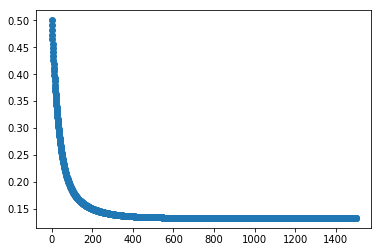

In [25]:
W, costList = descent(X, W, y)
plt.plot(range(len(costList)), costList, 'o')
plt.show()

In [26]:
predict = [1, (1650.-memoryList[0][0])/memoryList[0][1], (3-memoryList[1][0])/memoryList[1][1]]
rollback(hypothesis(predict, W), 2)

array([293098.24629642])

In [27]:
# Q3.3: normal Equation
def normEqtn(X,y):
    return np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),y)

data = open("d:/data/ML/ex01/ex1data2.txt", encoding='utf-8')
dataList = []
for i in data:
    dataList.append(i.strip('\n').split(','))
data = np.array(dataList, dtype=np.float32)
m = len(data)
memoryList = []
x1 = data[:, 0]
x2 = data[:, 1]
y = data[:, -1]
X = np.ones([m, 3])
X[:, 1] = x1
X[:, 2] = x2
n = len(X[0,:])
W = np.zeros([n, 1])

print ("$%0.2f" % float(hypothesis(normEqtn(X,y),[1,1650.,3])))

$293081.46
